In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/city_day.csv')

FileNotFoundError: ignored

In [ ]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()

NameError: ignored

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


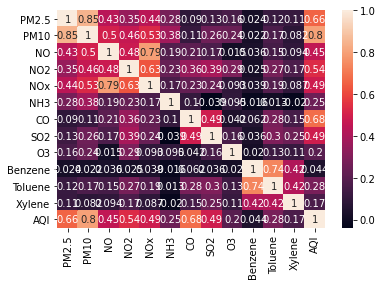

In [ ]:
#CORRELATION_ANALYSIS
sns.heatmap(df.corr(),annot=True)

In [ ]:
d=df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10)
newdf=d.reset_index('City')

In [ ]:
newdf

,City,AQI
0,Ahmedabad,452.122939
1,Delhi,259.487744
2,Patna,240.782042
3,Gurugram,225.123882
4,Lucknow,217.973059
5,Talcher,172.886819
6,Jorapokhar,159.251621
7,Brajrajnagar,150.280505
8,Kolkata,140.566313
9,Guwahati,140.111111


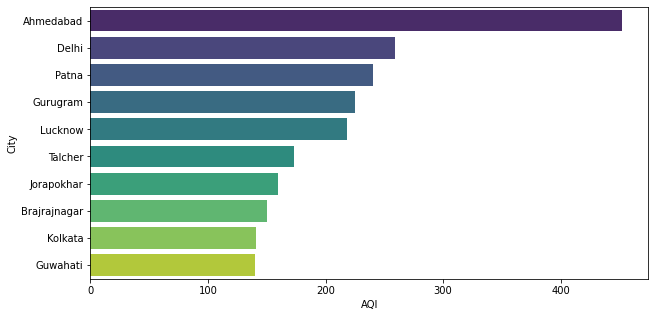

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=newdf,x='AQI',y='City',orient='h',palette='viridis')

In [ ]:
ndf = df.head(10)
n=ndf.dropna(axis=1)
ndf=n.drop('Date',axis=1)
nndf=ndf.drop('City',axis=1)
nndf

,NO2,NOx,SO2,O3,Benzene,Toluene,Xylene
0,18.22,17.15,27.64,133.36,0.00,0.02,0.00
1,15.69,16.46,24.55,34.06,3.68,5.50,3.77
2,19.30,29.70,29.07,30.70,6.80,16.40,2.25
3,18.48,17.97,18.59,36.08,4.43,10.14,1.00
4,21.42,37.76,39.33,39.31,7.01,18.89,2.78
5,38.48,81.50,45.76,46.51,5.42,10.83,1.93
6,40.62,130.77,32.28,33.47,0.00,0.00,0.00
7,36.74,96.75,38.54,31.89,0.00,0.00,0.00
8,31.00,48.00,58.68,25.75,0.00,0.00,0.00
9,7.04,0.00,8.29,4.55,0.00,0.00,0.00


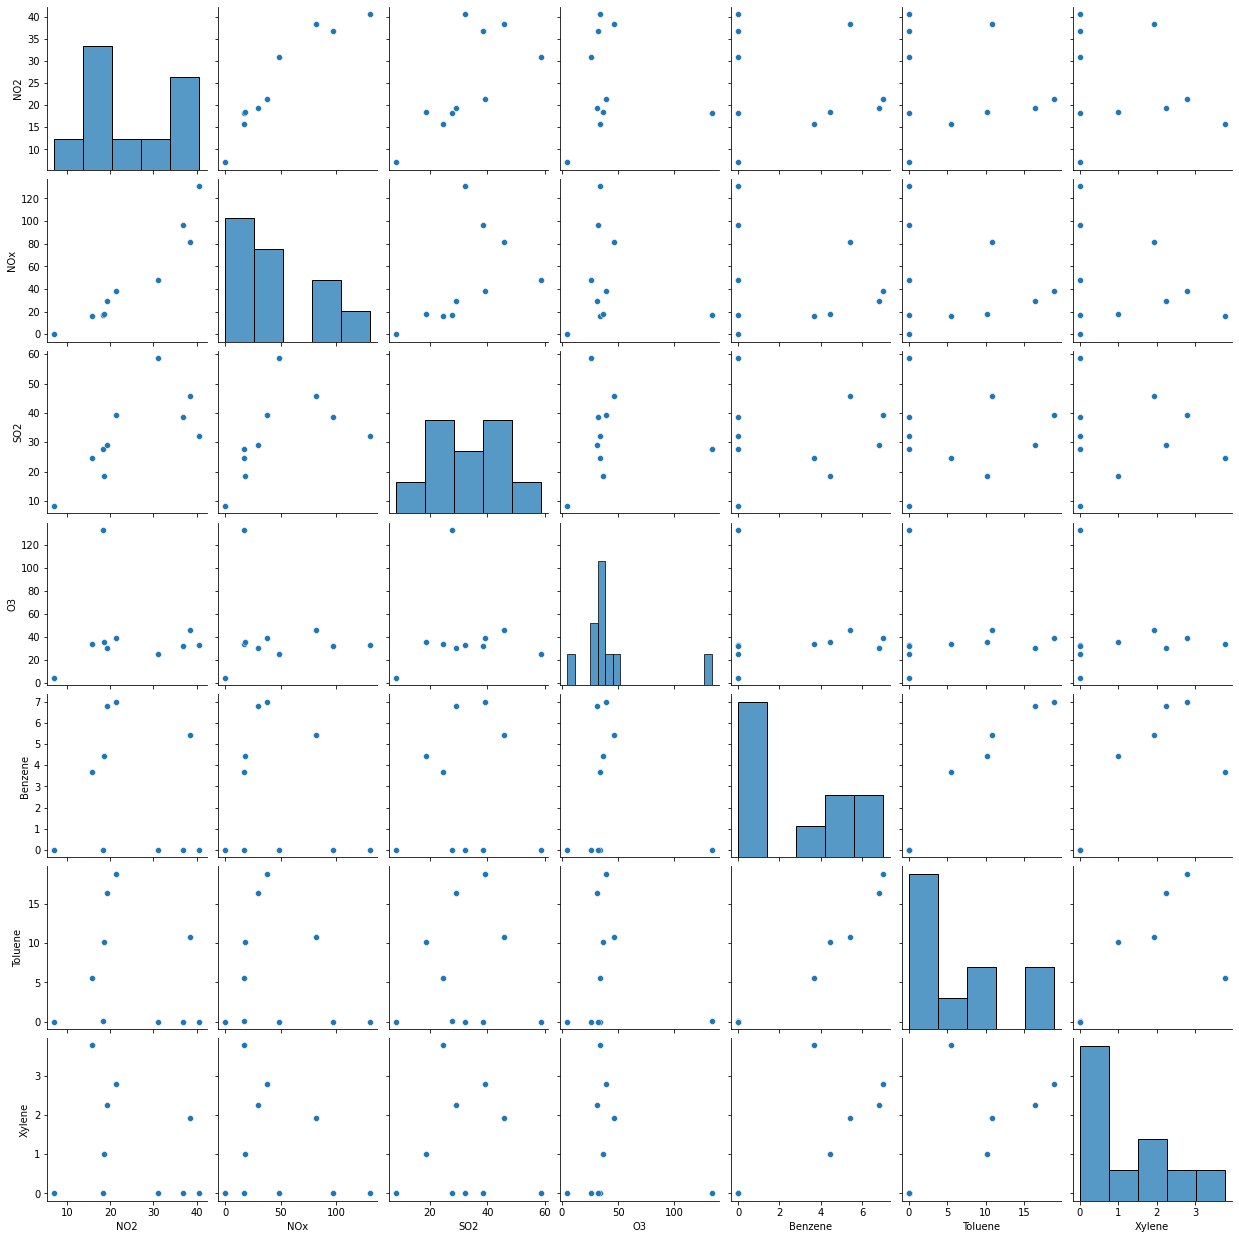

In [ ]:
sns.pairplot(nndf)

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
ddf=df.groupby(['City','Year','Month'])[['PM2.5','PM10','NOx','CO','NH3','O3','SO2','Benzene','Toluene','Xylene','AQI']].mean()
ndf=ddf.reset_index(['City','Year','Month'])

ndf.head



<bound method NDFrame.head of                City  Year  Month  ...    Toluene    Xylene         AQI
0         Ahmedabad  2015      1  ...   2.531290  2.976452  350.333333
1         Ahmedabad  2015      2  ...  23.225600  7.742000  520.640000
2         Ahmedabad  2015      3  ...  27.694000  4.073000  418.571429
3         Ahmedabad  2015      4  ...   7.461000  4.354000  308.640000
4         Ahmedabad  2015      5  ...  10.779677  5.206774  263.466667
...             ...   ...    ...  ...        ...       ...         ...
1000  Visakhapatnam  2020      3  ...  11.026774  2.168387   85.100000
1001  Visakhapatnam  2020      4  ...   6.908571  1.204286   54.321429
1002  Visakhapatnam  2020      5  ...   6.287742  1.161613   64.903226
1003  Visakhapatnam  2020      6  ...   8.140333  1.444667   82.200000
1004  Visakhapatnam  2020      7  ...        NaN       NaN   50.000000

[1005 rows x 14 columns]>

# Model


In [ ]:
X=nndf[[ 'NOx', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']]
y=ndf['AQI'].head(10)

# Train And Test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print(lm.intercept_)


464.5206970278905


In [ ]:
lm.coef_

array([ -1.76412068,  -1.0375516 ,  -0.93719161,  14.21196962,
       -18.19758693,  50.48701521])

In [ ]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
NOx,-1.764121
SO2,-1.037552
O3,-0.937192
Benzene,14.211970
Toluene,-18.197587
Xylene,50.487015


# Prediction 


In [ ]:
predictions=lm.predict(X_test)

In [ ]:
predictions

array([294.8266923 , 264.98965728, 280.24027644, 216.48698561])

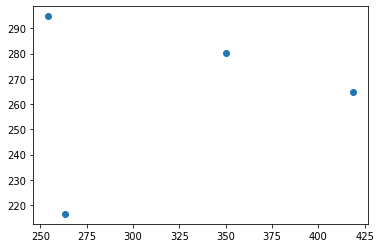

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


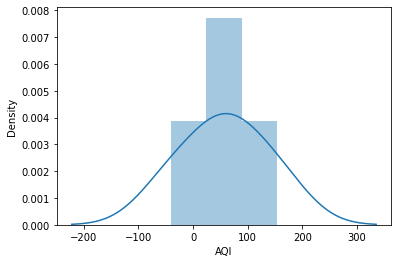

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

77.77770779688501

In [ ]:
metrics.mean_squared_error(y_test,predictions)

8086.050379156019

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

89.92246871141839

# Done
